[View in Colaboratory](https://colab.research.google.com/github/uranus666/Keras_CNN_mnist/blob/master/KerasCNN_1.ipynb)

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K

K.clear_session()

In [3]:
# split train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

#reshape data
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)  # reshape to be [samples][pixels][width][height]
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)   # reshape to be [samples][pixels][width][height]
input_shape = (img_rows, img_cols, 1)


# normalize inputs from 0-255 to 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [0]:
#size of parameters
batch_size = 32
num_classes = 10
epochs = 12

In [0]:

#  one hot encode outputs
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [0]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [0]:

#Start Neural Network
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))  #(output_depth, (window_height, window_width)) (shape (window_height, window_width, input_depth) ).
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
__________

In [11]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          callbacks=callbacks,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 33s 546us/step - loss: 0.1666 - acc: 0.9473 - val_loss: 0.0356 - val_acc: 0.9871
Epoch 2/12
60000/60000 [==============================] - 31s 519us/step - loss: 0.0587 - acc: 0.9822 - val_loss: 0.0282 - val_acc: 0.9911
Epoch 3/12
60000/60000 [==============================] - 30s 502us/step - loss: 0.0442 - acc: 0.9868 - val_loss: 0.0229 - val_acc: 0.9926
Epoch 4/12
60000/60000 [==============================] - 30s 494us/step - loss: 0.0364 - acc: 0.9892 - val_loss: 0.0194 - val_acc: 0.9940
Epoch 5/12
60000/60000 [==============================] - 31s 519us/step - loss: 0.0330 - acc: 0.9899 - val_loss: 0.0195 - val_acc: 0.9937
Epoch 6/12
60000/60000 [==============================] - 31s 509us/step - loss: 0.0283 - acc: 0.9913 - val_loss: 0.0159 - val_acc: 0.9948
Epoch 7/12
60000/60000 [==============================] - 30s 502us/step - loss: 0.0266 - acc: 0.9914 - val_loss: 0.

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02132141923392087
Test accuracy: 0.9941


In [0]:
n_model = load_model('best_model.h5')

In [14]:
predictions = n_model.predict(x_test)

print(np.argmax(predictions[12]))


9


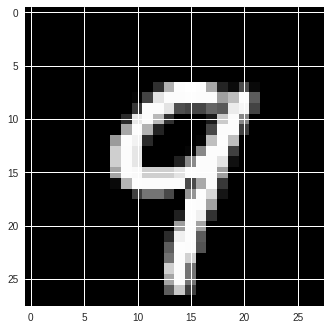

In [15]:
plt.imshow(x_test[12].reshape(28, 28), cmap='gray')
plt.show()